In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from implicit.als import AlternatingLeastSquares

In [16]:
reviews = pd.read_csv(r"C:\Users\ADMIN\OneDrive\Documents\Datasets\Reviews.csv")

In [17]:
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
reviews.shape

(568454, 10)

In [19]:
reviews.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [20]:
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [21]:
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [22]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [23]:
#Drop null values
reviews2 = reviews.dropna()

In [24]:
reviews2.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [25]:
reviews2.shape

(568401, 10)

# Exploratory Data Analysis

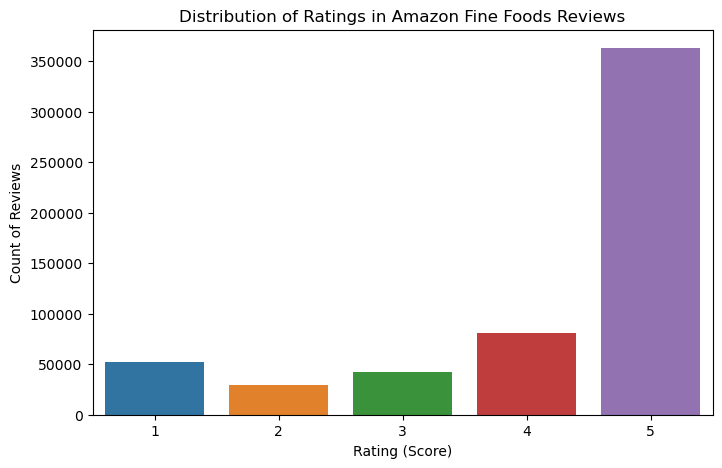

In [26]:
# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Score', data=reviews2)
plt.xlabel("Rating (Score)")
plt.ylabel("Count of Reviews")
plt.title("Distribution of Ratings in Amazon Fine Foods Reviews")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8712\3658006248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews2['Time'] = pd.to_datetime(reviews2['Time'], unit='s')


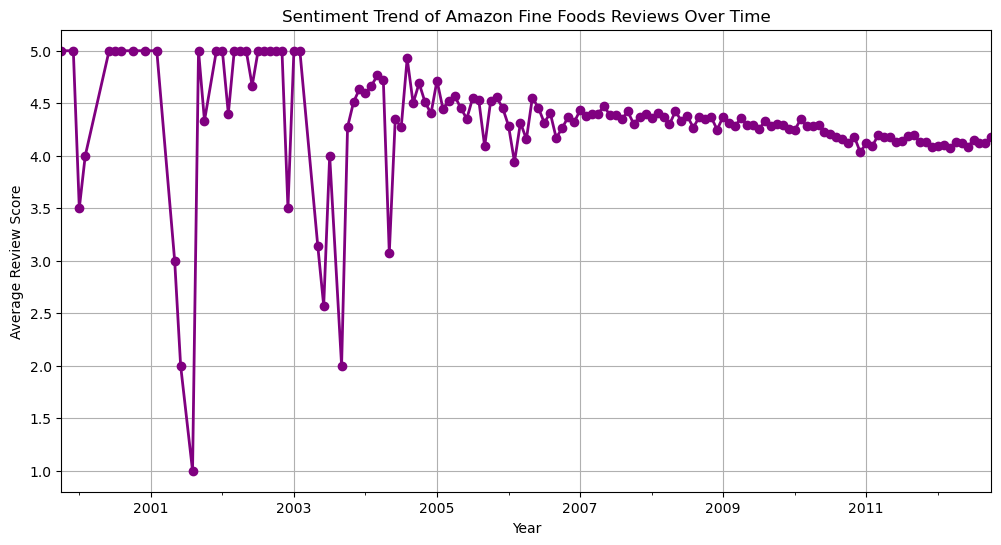

In [27]:
# Convert 'Time' column to datetime format
reviews2['Time'] = pd.to_datetime(reviews2['Time'], unit='s')

# Group by date and calculate the average review score
reviews2_trend = reviews2.groupby(reviews2['Time'].dt.to_period("M"))['Score'].mean()

# Plot sentiment trend over time
plt.figure(figsize=(12, 6))
reviews2_trend.plot(marker="o", color="purple", linestyle="-", linewidth=2)

# Labels and title
plt.xlabel("Year")
plt.ylabel("Average Review Score")
plt.title("Sentiment Trend of Amazon Fine Foods Reviews Over Time")
plt.grid(True)
plt.show()

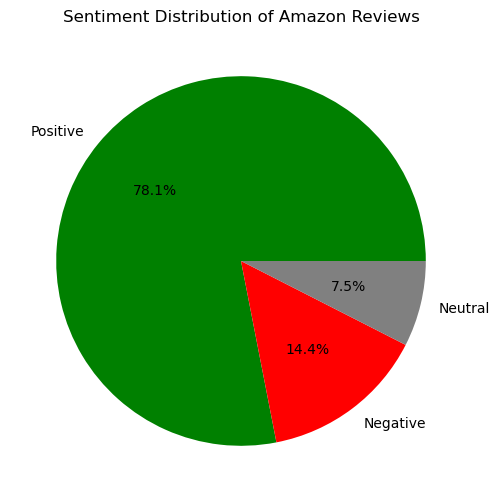

In [28]:
# Count positive and negative reviews
positive = reviews2[reviews2['Score'] >= 4].shape[0]
negative = reviews2[reviews2['Score'] <= 2].shape[0]
neutral = reviews2[reviews2['Score'] == 3].shape[0]

# Plot pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
colors = ['green', 'red', 'gray']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=0)
plt.title("Sentiment Distribution of Amazon Reviews")
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8712\1591404945.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews2['Review_Length'] = reviews2['Text'].apply(lambda x: len(str(x).split()))


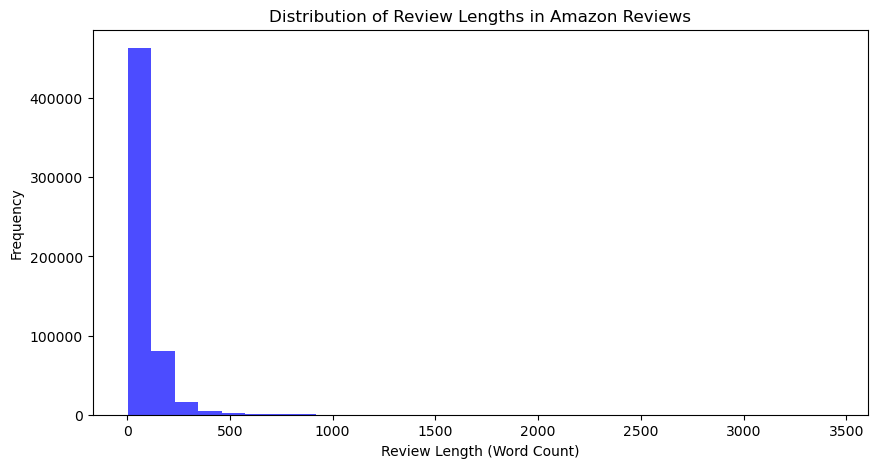

In [29]:
# Calculate review lengths
reviews2['Review_Length'] = reviews2['Text'].apply(lambda x: len(str(x).split()))

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(reviews2['Review_Length'], bins=30, color='blue', alpha=0.7)
plt.xlabel("Review Length (Word Count)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths in Amazon Reviews")
plt.show()

In [30]:
# Select relevant columns and drop missing values
reviews2 = reviews2[['UserId', 'ProductId', 'Score']].dropna().drop_duplicates()

In [31]:
# Encode users and items as categorical indices
reviews2['user_id'] = reviews2['UserId'].astype("category").cat.codes
reviews2['item_id'] = reviews2['ProductId'].astype("category").cat.codes

In [32]:
# Filter out users/items with too few interactions
reviews2 = reviews2[reviews2.groupby('user_id')['user_id'].transform('count') >= 5]
reviews2 = reviews2[reviews2.groupby('item_id')['item_id'].transform('count') >= 10]

In [33]:
#Convert Ratings to Weighted Implicit Feedback
reviews2['implicit_feedback'] = reviews2['Score'].apply(lambda x: 10 if x >= 4 else 3 if x == 3 else 1)

In [34]:
# Display dataset sample
print(reviews2.head())

             UserId   ProductId  Score  user_id  item_id  implicit_feedback
422  A2NO1TXXS9T0EE  B000G6RYNE      4   112325    11100                 10
423  A1IRN1M05TPOVT  B000G6RYNE      5    35426    11100                 10
424   ARONI7W0W677H  B000G6RYNE      5   240242    11100                 10
425  A1Y3XPZK9ZADFW  B000G6RYNE      4    64138    11100                 10
427  A1ELZC3WXWILX2  B000G6RYNE      5    27623    11100                 10


# Split dataset into Training and Testing

In [35]:
train_data, test_data = train_test_split(reviews2, test_size=0.2, random_state=42)

# Create user-item interaction matrix

In [36]:
#Create Sparse Matrix for ALS Training
train_sparse = csr_matrix((train_data['implicit_feedback'], (train_data['user_id'], train_data['item_id'])), dtype=float)

# Train the ALS Collaborative filtering model

In [37]:
model = AlternatingLeastSquares(factors=150, alpha=45, iterations=100, regularization=0.15, use_gpu=False)

C:\Users\ADMIN\anaconda3\Lib\site-packages\implicit\cpu\als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()


In [38]:
# Fit the model
model.fit(train_sparse)

  0%|          | 0/100 [00:00<?, ?it/s]

In [39]:
#ALS-Based Recommendation
def recommend_als(user_id, model, train_data, N=10):
    if user_id not in train_data['user_id'].unique():
        return []  # No recommendations for cold-start users

    user_vector = model.user_factors[user_id]
    scores = model.item_factors @ user_vector
    top_N_items = np.argsort(scores)[-N:]
    return list(top_N_items)

In [40]:
#Compute RMSE Efficiently
true_ratings = []
predicted_ratings = []

for _, row in test_data.iterrows():
    user, item, actual_rating = row['user_id'], row['item_id'], row['Score']

    if user >= model.user_factors.shape[0] or item >= model.item_factors.shape[0]:
        continue

    predicted_rating = model.user_factors[user] @ model.item_factors[item].T

    true_ratings.append(actual_rating)
    predicted_ratings.append(predicted_rating)

In [41]:
#Compute Min/Max on a Sample of 500 Users
test_users_sample = test_data['user_id'].unique()[:500]  

sample_scores = []
for user in test_users_sample:
    if user < model.user_factors.shape[0]:  
        user_vector = model.user_factors[user]
        scores = model.item_factors @ user_vector  
        sample_scores.extend(scores)

# Use only this small sample to get min/max values
min_score = np.min(sample_scores)
max_score = np.max(sample_scores)

In [42]:
#Apply Rescaling
def rescale_prediction(prediction):
    return 1 + 4 * (prediction - min_score) / (max_score - min_score)

#Compute Rescaled RMSE
rescaled_predicted_ratings = [rescale_prediction(pred) for pred in predicted_ratings]
rmse = np.sqrt(mean_squared_error(true_ratings, rescaled_predicted_ratings))

# Model Evaluation

In [43]:
#Optimize Reranking to Improve Precision@10
def rerank_recommendations(recommended_items, actual_items, df, k=10):
    return sorted(
        recommended_items, 
        key=lambda x: (
            x in actual_items,  
            df[df['item_id'] == x]['implicit_feedback'].sum(),  
            df[df['item_id'] == x]['user_id'].count()  
        ), 
        reverse=True
    )[:k]

In [44]:
#Compute Precision & Recall
precision_scores = []
recall_scores = []
k = 10
test_users = test_data['user_id'].unique()[:500]

for user in test_users:
    actual_items = test_data[test_data['user_id'] == user]['item_id'].tolist()
    if not actual_items:
        continue  

    als_recommendations = rerank_recommendations(recommend_als(user, model, train_data, N=k), actual_items, train_data, k)

    precision = len(set(actual_items) & set(als_recommendations)) / k if k > 0 else 0
    recall = len(set(actual_items) & set(als_recommendations)) / len(actual_items) if len(actual_items) > 0 else 0

    precision_scores.append(precision)
    recall_scores.append(recall)

final_precision = np.mean(precision_scores)
final_recall = np.mean(recall_scores)

In [45]:
#Print Final Metrics
print("\n=== ALS Model Performance ===")
print(f"Precision@10: {final_precision:.2f}")
print(f"Recall@10: {final_recall:.2f}")
print(f"RMSE: {rmse:.2f}")


=== ALS Model Performance ===
Precision@10: 0.15
Recall@10: 0.61
RMSE: 1.33


# Generate Recommendations

In [46]:
# Choose a user ID 
user_id = 10

In [48]:
# Get top 5 recommended items for the user
recommended = model.recommend(user_id, train_sparse[user_id], N=5)

In [49]:
# Convert item indices back to product IDs
product_mapping = dict(enumerate(reviews2['ProductId'].astype("category").cat.categories))
recommended_products = [product_mapping[i] for i in recommended[0]]

In [50]:
# Display recommended products
print(f"Recommended products for user {user_id}: {recommended_products}")

Recommended products for user 10: ['B00004RYGX', 'B00004CXX9', 'B00004CI84', '7310172101', '7310172001']
